In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from typing import List, Dict, Tuple

%matplotlib inline

In [60]:
drivers = pd.read_csv("dataset/drivers.csv")
drivers_standings = pd.read_csv("dataset/driver_standings.csv")
races = pd.read_csv("dataset/races.csv")
results = pd.read_csv("dataset/results.csv")

In [61]:
# drivers' details, driverId, dob, ... and all the races he participated in
# with the years of those races so foreach driver we have a list of his
# races and the year of each race
driver_positions_per_year = pd.merge(
    drivers[["driverId", "dob", "forename", "surname", "nationality"]],
    results[["raceId", "driverId", "position"]],
    on=["driverId"],
    how="inner",
).merge(races[["raceId", "year"]], on=["raceId"], how="inner")
driver_positions_per_year = driver_positions_per_year[
    driver_positions_per_year["year"] >= 2000
]
# extract the year only from the date of birth
driver_positions_per_year["dob"] = pd.DatetimeIndex(
    driver_positions_per_year["dob"]
).year

# merge their names, makes it easiear to google a driver
driver_positions_per_year["Name"] = (
    driver_positions_per_year["forename"] + " " + driver_positions_per_year["surname"]
)

driver_positions_per_year = driver_positions_per_year.drop("forename", axis=1)
driver_positions_per_year = driver_positions_per_year.drop("surname", axis=1)
driver_positions_per_year = driver_positions_per_year.sort_values(
    by=["driverId", "year", "raceId"]
)
driver_positions_per_year["age"] = (
    driver_positions_per_year["year"] - driver_positions_per_year["dob"]
)

driver_positions_per_year

,driverId,dob,nationality,raceId,position,year,Name,age
368,1,1985,British,36,3,2007,Lewis Hamilton,22
390,1,1985,British,37,2,2007,Lewis Hamilton,22
412,1,1985,British,38,2,2007,Lewis Hamilton,22
434,1,1985,British,39,2,2007,Lewis Hamilton,22
456,1,1985,British,40,2,2007,Lewis Hamilton,22
...,...,...,...,...,...,...,...,...
6518,855,1999,Chinese,1093,12,2022,Guanyu Zhou,23
6538,855,1999,Chinese,1094,13,2022,Guanyu Zhou,23
6558,855,1999,Chinese,1095,12,2022,Guanyu Zhou,23
6578,855,1999,Chinese,1096,12,2022,Guanyu Zhou,23


In [62]:
driver_positions_per_year = driver_positions_per_year[
    driver_positions_per_year["position"] != "\\N"
]
driver_positions_per_year["position"] = driver_positions_per_year["position"].astype(int)

driver_positions_per_year=driver_positions_per_year[driver_positions_per_year["position"]<=20]
driver_positions_per_year["position"].unique()


/tmp/ipykernel_29228/363176470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_positions_per_year["position"] = driver_positions_per_year["position"].astype(int)


array([ 3,  2,  1,  9,  5,  4,  7, 13, 10, 12,  6, 16, 18, 14,  8, 19, 15,
       11, 17, 20])

In [63]:
mean_positions = driver_positions_per_year.groupby(["age"])["position"].mean().reset_index()
mean_positions

,age,position
0,18,9.800000
1,19,8.432432
2,20,10.901786
3,21,10.080000
4,22,10.522145
5,23,10.666667
6,24,9.401980
7,25,8.779026
8,26,9.624615
9,27,8.773196


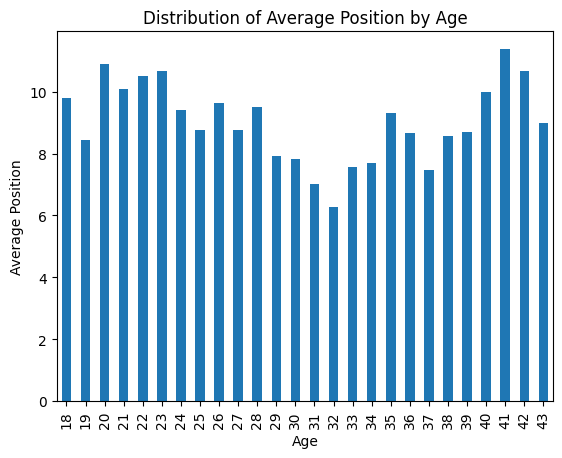

In [64]:

ax = mean_positions.plot(kind='bar', x='age', y='position', legend=False)
ax.set_xlabel('Age')
ax.set_ylabel('Average Position')
ax.set_title('Distribution of Average Position by Age')
plt.show()

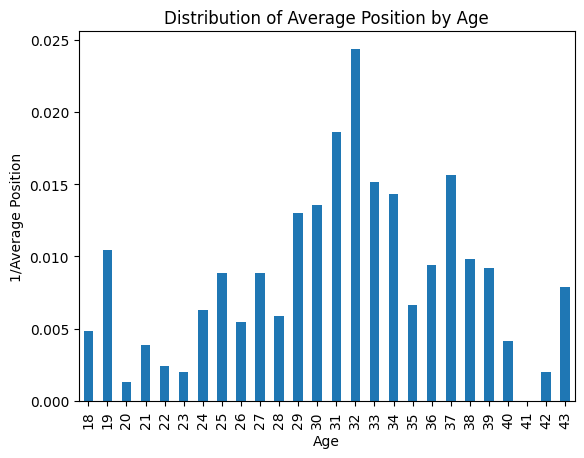

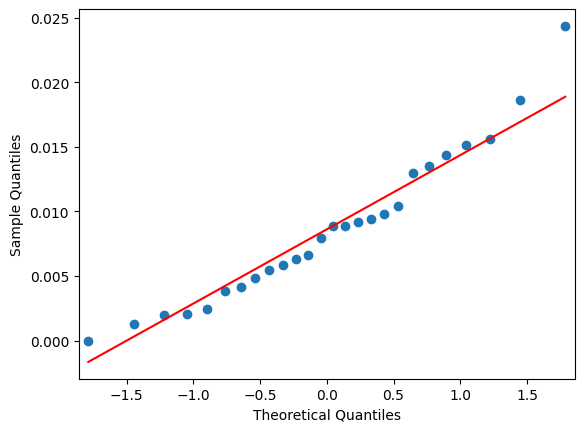

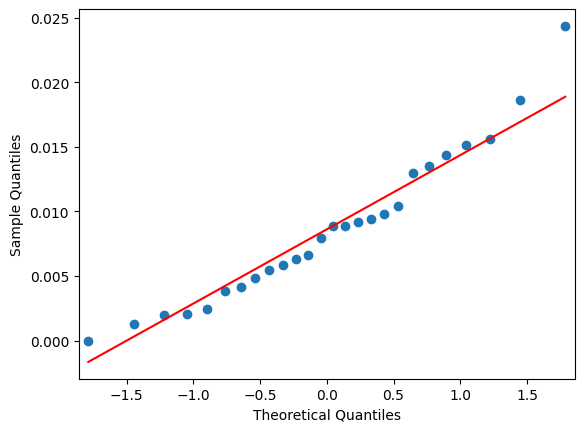

In [65]:
inv_mean_positions = mean_positions.copy()
inv_mean_positions["position"] = 1 / mean_positions["position"]
inv_mean_positions["position"] = (
    inv_mean_positions["position"] - inv_mean_positions["position"].min()
) / inv_mean_positions["position"].sum()
ax = inv_mean_positions.plot(kind="bar", x="age", y="position", legend=False)
ax.set_xlabel("Age")
ax.set_ylabel("1/Average Position")
ax.set_title("Distribution of Average Position by Age")
plt.show()

sm.qqplot(inv_mean_positions["position"], line="s")

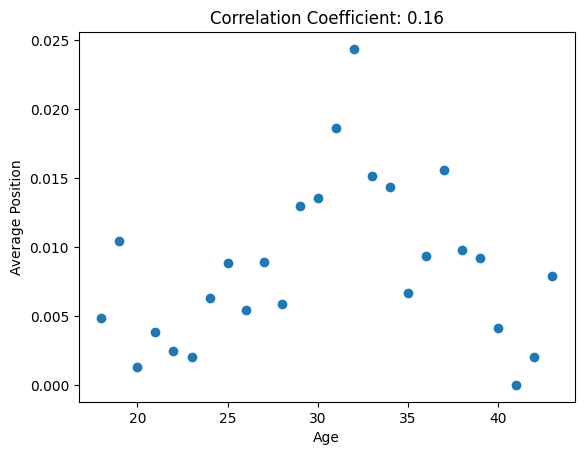

In [66]:
df = inv_mean_positions

# calculate the correlation coefficient
corr_coef = df['position'].corr(df['age'])

# create a scatter plot
plt.scatter(df['age'], df['position'])
plt.xlabel('Age')
plt.ylabel('Average Position')
plt.title(f'Correlation Coefficient: {corr_coef:.2f}')
plt.show()